In [100]:
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import pandas as pd
import numpy as np
import random

In [101]:
#вектор длиной 10
x_10 = np.array(random.sample(range(100), 10))
y_10 = np.array(random.sample(range(100), 10))
#вектор длиной 50
x_50 = np.array(random.sample(range(100), 50))
y_50 = np.array(random.sample(range(100), 50))
#вектор длиной 100
x_100 = np.array(random.sample(range(100), 100))
y_100 = np.array(random.sample(range(100), 100))

In [102]:
#наивное скалярное произведение 
def naivScal(x,y):
    assert x.ndim == 1 and y.ndim == 1
    assert x.size == y.size
    res = 0
    for i in range(x.size):
        res += x[i]*y[i]
    return res

In [103]:
#реализация в NumPy
def NumPyScal(x,y):
    assert x.ndim == 1 and y.ndim == 1
    assert x.size == y.size
    return np.dot(x,y)

In [104]:
#Функция измерения времени исполнения заданной функции
def time(func, x, y):
    times = []
    for iter in range(10000):
        t = timer()
        func(x, y)
        delta = timer() - t
        times.append(delta)
    return sum(times)/len(times)

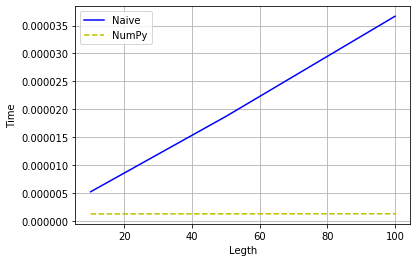

In [105]:
#Значения для оси y
timeNaivScal = np.array([time(naivScal, x_10, y_10), time(naivScal, x_50, y_50), time(naivScal, x_100, y_100)])
timeNumPyScal = np.array([time(NumPyScal, x_10, y_10), time(NumPyScal, x_50, y_50), time(NumPyScal, x_100, y_100)])
#график.
plt.xlabel("Legth")
plt.ylabel("Time")
plt.grid()
plt.plot(xRange, timeNaivScal, '-', color = 'b', label = "Naive")
plt.plot(xRange, timeNumPyScal, '--', color = 'y', label = "NumPy")
plt.legend(loc="upper left")


In [106]:
#Создание DataFrame.
res = pd.DataFrame({
    "Length": xRange,
    "Naive time": timeNaivScal,
    "NumPy time": timeNumPyScal
})
print(res)

   Length  Naive time  NumPy time
0      10    0.000005    0.000001
1      50    0.000019    0.000001
2     100    0.000037    0.000001


In [108]:
#сравнение эффективности двух способов при помощи обращения к DataFrame
if (res.at[0,"Naive time"] > res.at[0,"NumPy time"]) & (res.at[1,"Naive time"] > res.at[1,"NumPy time"]) & (res.at[1,"Naive time"] > res.at[1,"NumPy time"]):
    print("Наивное произведение выполняется дольше")
else:
    print('Наивное произведение выполняется быстрее')


Наивное произведение выполняется дольше
